<a href="https://colab.research.google.com/github/sunil1206/Data-science/blob/main/WINE_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOAD DATASET

In [ ]:
import pandas as pd
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report
df= pd.read_csv('/content/Wine.csv')

In [ ]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
df.info

<bound method DataFrame.info of      Alcohol  Malic_Acid   Ash  ...   Hue  OD280  Proline
0      14.23        1.71  2.43  ...  1.04   3.92     1065
1      13.20        1.78  2.14  ...  1.05   3.40     1050
2      13.16        2.36  2.67  ...  1.03   3.17     1185
3      14.37        1.95  2.50  ...  0.86   3.45     1480
4      13.24        2.59  2.87  ...  1.04   2.93      735
..       ...         ...   ...  ...   ...    ...      ...
173    13.71        5.65  2.45  ...  0.64   1.74      740
174    13.40        3.91  2.48  ...  0.70   1.56      750
175    13.27        4.28  2.26  ...  0.59   1.56      835
176    13.17        2.59  2.37  ...  0.60   1.62      840
177    14.13        4.10  2.74  ...  0.61   1.60      560

[178 rows x 13 columns]>

In [ ]:
df.describe(include='all')

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
x=df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values

In [ ]:
x

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

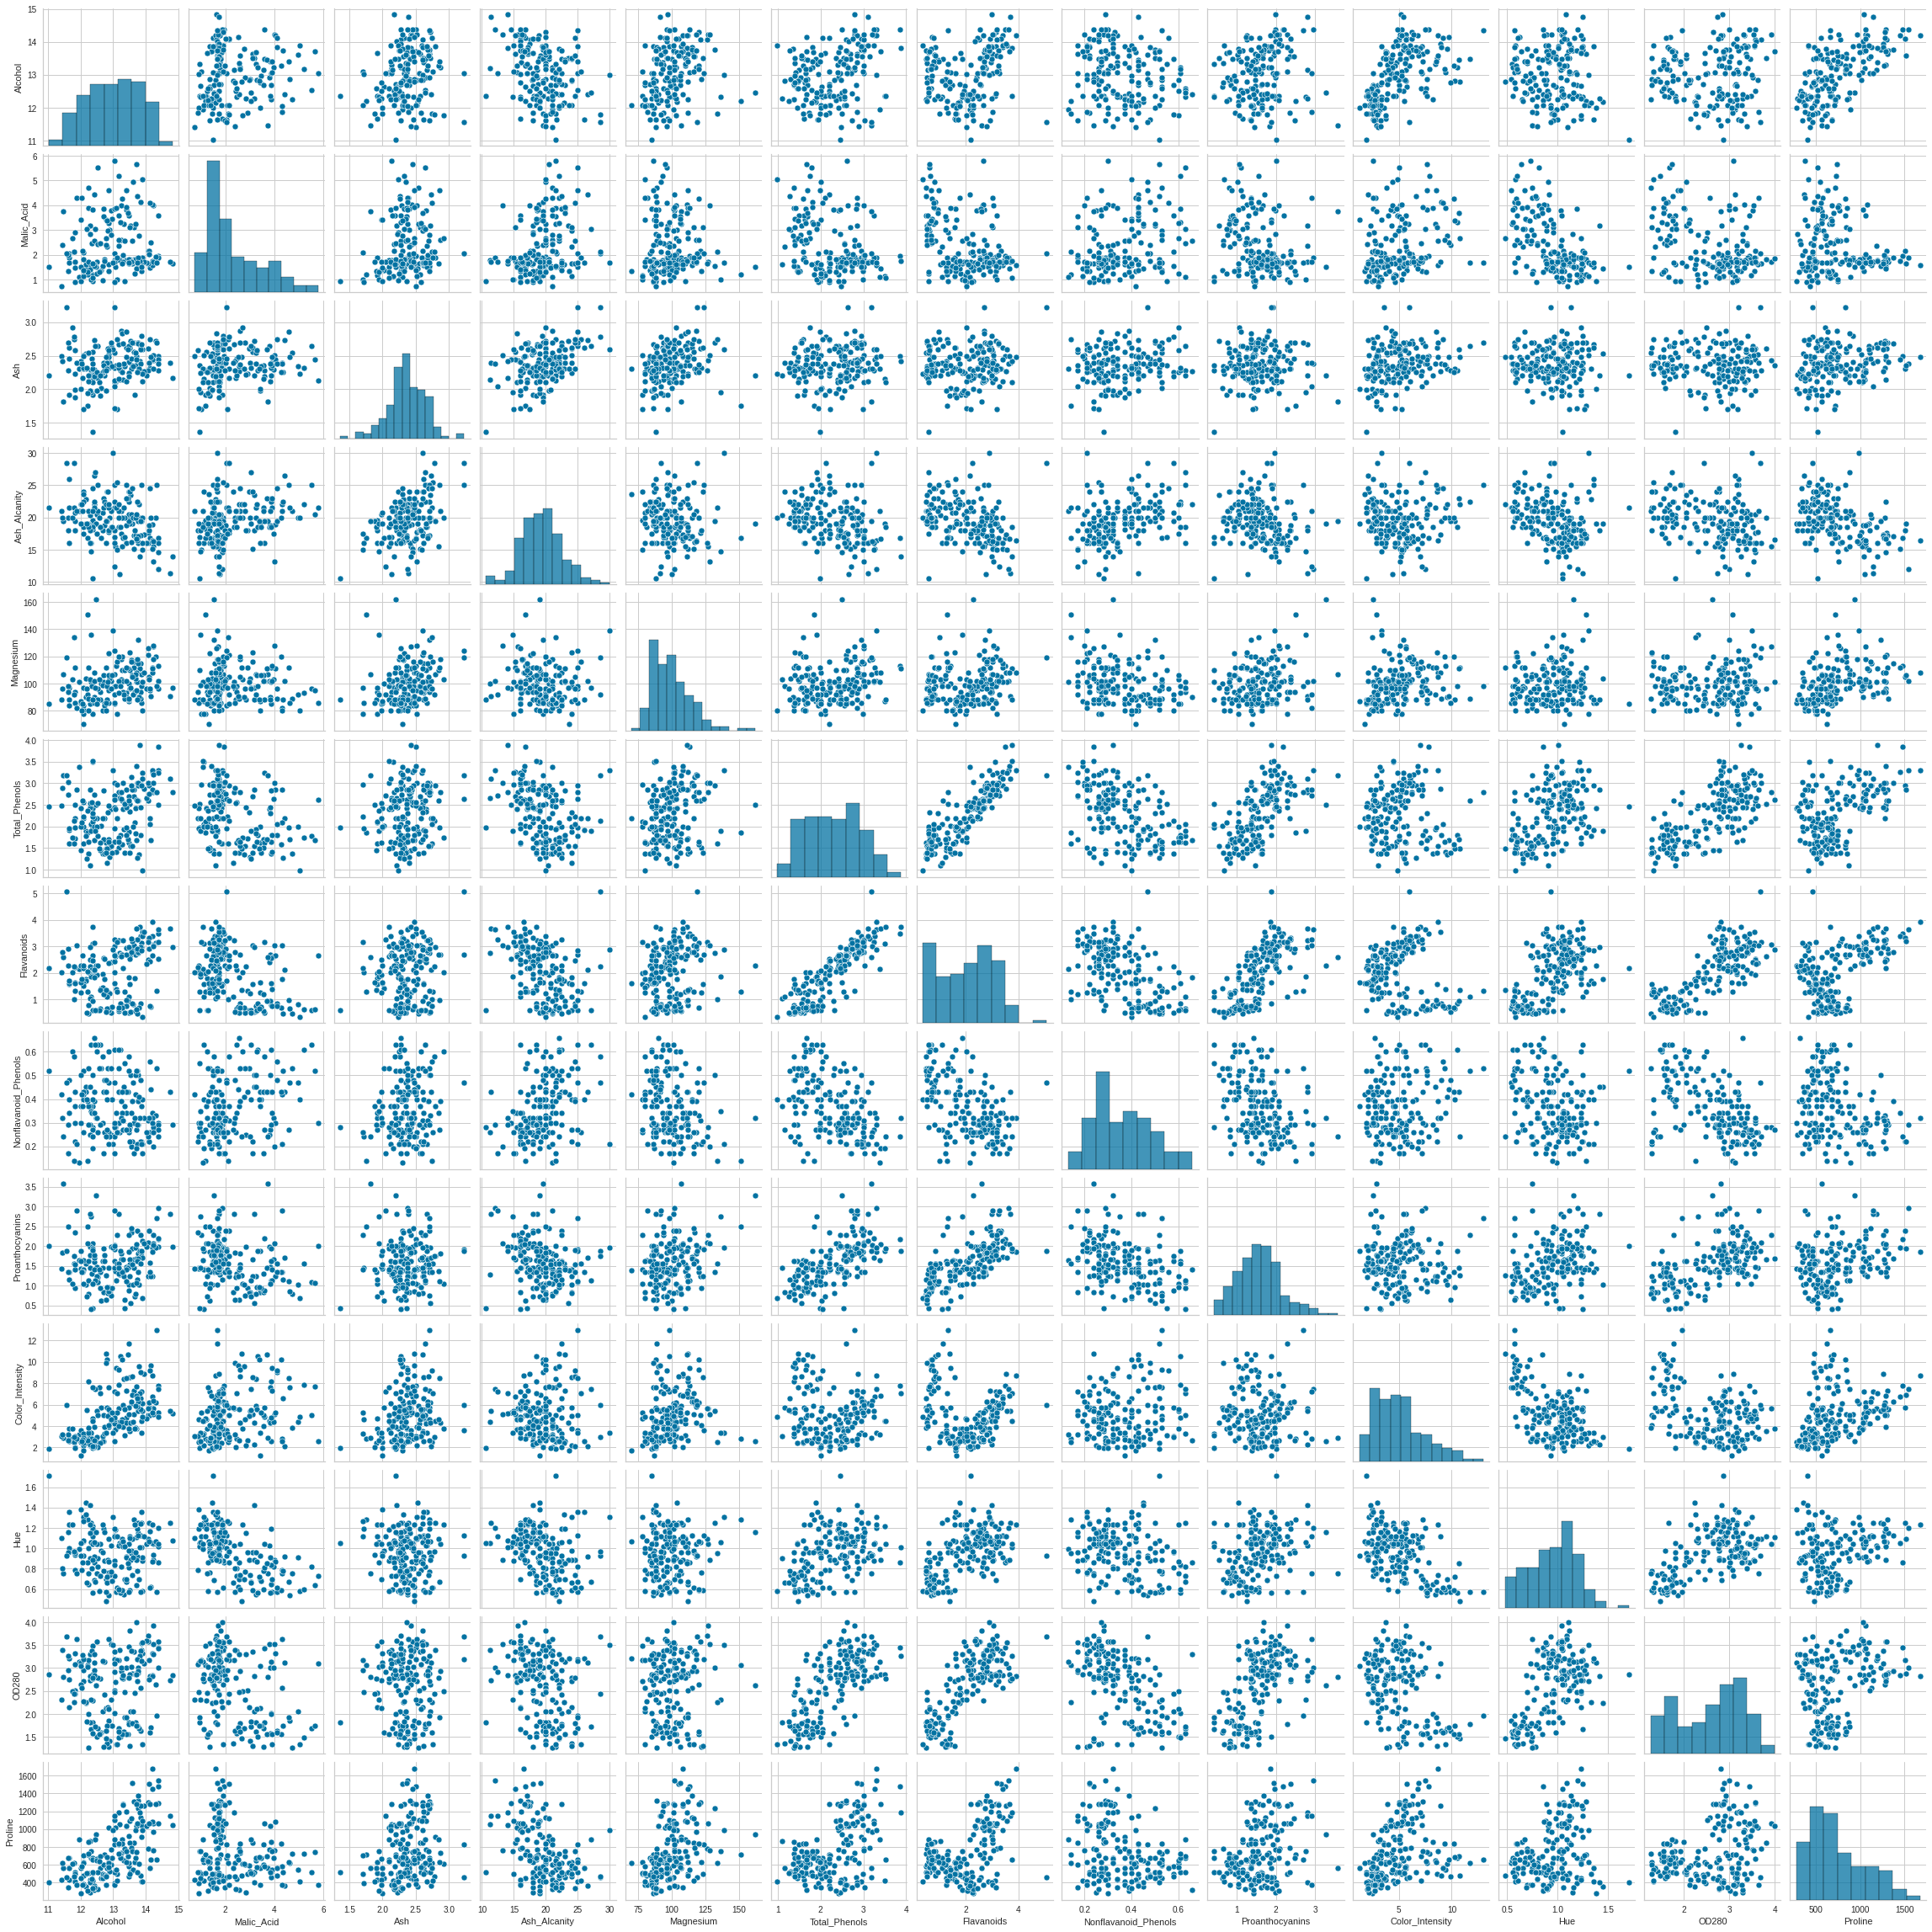

In [ ]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
from sklearn.cluster import KMeans
model_kmeans=KMeans(n_clusters=2)
model_kmeans.fit(x)
labels=model_kmeans.predict(x)
print(labels)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
df1['label']=labels
wine=df1[df1["label"]==0]
print('Number of customer in 1st group=', len(wine))
wine=df1[df1["label"]==1]
print('Number of customer in 1st group=', len(wine))


Number of customer in 1st group= 123
Number of customer in 1st group= 55


In [ ]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

17592296.383508474
4543749.614531861
2370689.686782969
1337029.49294159
916379.1871539169
647326.0020260848
412303.8282508012
323223.24705426686
270954.9292415376
217887.37856033302


Text(0, 0.5, 'WCSS')

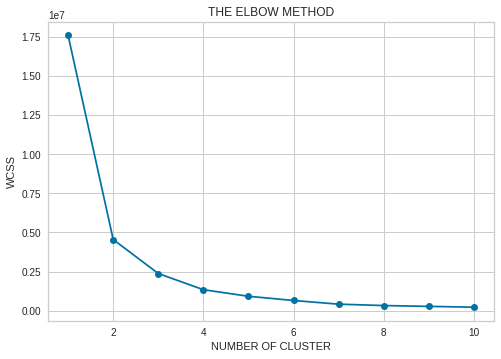

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1,11), wcss,'-o')
plt.title('THE ELBOW METHOD')
plt.xlabel('NUMBER OF CLUSTER')
plt.ylabel('WCSS') 

In [ ]:
# Running K-Means Model

cluster_Kmeans = KMeans(n_clusters=5)
model_kmeans = cluster_Kmeans.fit(x)
pred_kmeans = model_kmeans.fit_predict(x)
pred_kmeans

array([4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 4,
       0, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 4, 0, 0, 4,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 4, 1, 4, 1, 3, 4,
       2, 2, 4, 1, 4, 1, 2, 4, 4, 1, 1, 1, 2, 1, 3, 4, 4, 2, 2, 1, 2, 2,
       4, 4, 2, 1, 2, 3, 3, 2, 1, 1, 4, 1, 4, 2, 1, 1, 4, 3, 2, 2, 3, 4,
       2, 3, 2, 1, 1, 1, 2, 3, 1, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 4, 2, 1,
       2, 2, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 1, 4, 4, 1, 1, 1, 3, 4,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4,
       4, 2], dtype=int32)

In [ ]:
df1=df[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']]

df1["label_kmeans"] = pred_kmeans
#The data with labels
df1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,label_kmeans
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [ ]:
wine=df1[df1["label_kmeans"]==0]
print('Number of customer in 1st group=', len(wine))
wine=df1[df1["label_kmeans"]==1]
print('Number of customer in 2st group=', len(wine))
wine=df1[df1["label_kmeans"]==2]
print('Number of customer in 3st group=', len(wine))
wine=df1[df1["label_kmeans"]==3]
print('Number of customer in 4st group=', len(wine))
wine=df1[df1["label_kmeans"]==4]
print('Number of customer in 5st group=', len(wine))

Number of customer in 1st group= 45
Number of customer in 2st group= 29
Number of customer in 3st group= 44
Number of customer in 4st group= 12
Number of customer in 5st group= 48


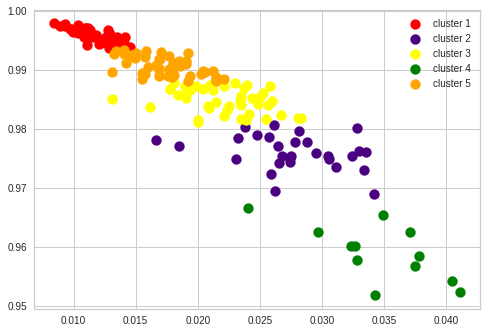

In [ ]:
plt.scatter(x[pred_kmeans==0,0],x[pred_kmeans==0,12],s=100,c='red',label='cluster 1')
plt.scatter(x[pred_kmeans==1,0],x[pred_kmeans==1,12],s=100,c='indigo',label='cluster 2')
plt.scatter(x[pred_kmeans==2,0],x[pred_kmeans==2,12],s=100,c='yellow',label='cluster 3')
plt.scatter(x[pred_kmeans==3,0],x[pred_kmeans==3,12],s=100,c='green',label='cluster 4')
plt.scatter(x[pred_kmeans==4,0],x[pred_kmeans==4,12],s=100,c='orange',label='cluster 5')
plt.legend()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(scaler,model_kmeans)
pipe.fit(x)
label_sc=pipe.predict(x)

In [ ]:
label_sc

array([4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0,
       4, 4, 0, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 0, 4, 4, 0,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 2, 0, 1, 1, 0,
       2, 2, 0, 0, 4, 1, 2, 0, 4, 2, 2, 2, 0, 1, 1, 0, 0, 3, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 0,
       2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [ ]:
df1["label_sc"] = label_sc
#The data with labels
df1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,label_kmeans,label_sc
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4,4
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,4
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,4
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,4
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,0


In [ ]:
wine=df1[df1["label_sc"]==0]
print('Number of customer in 1st group=', len(wine))
wine=df1[df1["label_sc"]==1]
print('Number of customer in 2st group=', len(wine))
wine=df1[df1["label_sc"]==2]
print('Number of customer in 3st group=', len(wine))
wine=df1[df1["label_sc"]==3]
print('Number of customer in 4st group=', len(wine))
wine=df1[df1["label_sc"]==4]
print('Number of customer in 5st group=', len(wine))

Number of customer in 1st group= 34
Number of customer in 2st group= 21
Number of customer in 3st group= 26
Number of customer in 4st group= 44
Number of customer in 5st group= 53


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pipe=make_pipeline(pca,model_kmeans)
pipe.fit(x)
label_pca=pipe.predict(x)
print(label_pca)

[3 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 0 3 3 0 0 3 0 0 0 0 0 0 0 3
 0 0 1 3 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 1 3 4 3 4 2 3 1 1 3 4 3 4 1 3
 3 4 4 4 1 4 2 3 3 1 1 4 1 1 3 3 1 4 1 2 2 1 4 4 3 4 3 1 4 4 3 2 1 1 2 3 1
 2 1 4 4 4 1 2 4 1 1 2 2 4 4 4 4 4 2 3 1 4 1 1 3 3 3 1 1 1 1 3 1 1 3 3 4 3
 3 4 4 4 2 3 1 3 1 3 3 3 1 1 1 1 3 1 1 3 3 1 1 1 3 3 3 3 3 1]


In [ ]:
df1["label_pca"] = label_pca
#The data with labels
df1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,label_kmeans,label_sc,label_pca
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4,4,3
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,4,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,4,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,4,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,0,1


In [ ]:
wine=df1[df1["label_pca"]==0]
print('Number of customer in 1st group=', len(wine))
wine=df1[df1["label_pca"]==1]
print('Number of customer in 2st group=', len(wine))
wine=df1[df1["label_pca"]==2]
print('Number of customer in 3st group=', len(wine))
wine=df1[df1["label_pca"]==3]
print('Number of customer in 4st group=', len(wine))
wine=df1[df1["label_pca"]==4]
print('Number of customer in 5st group=', len(wine))

Number of customer in 1st group= 45
Number of customer in 2st group= 44
Number of customer in 3st group= 12
Number of customer in 4st group= 48
Number of customer in 5st group= 29


In [ ]:
x=df.values
x.shape

(178, 13)

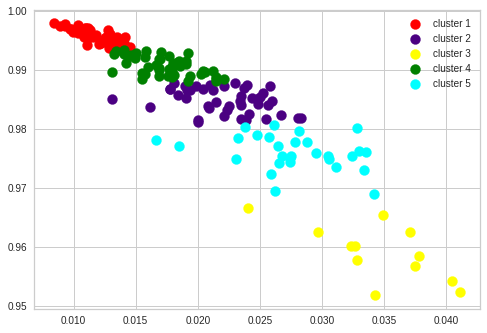

In [ ]:
plt.scatter(x[label_pca==0,0],x[label_pca==0,12],s=100,c='red',label='cluster 1')
plt.scatter(x[label_pca==1,0],x[label_pca==1,12],s=100,c='indigo',label='cluster 2')
plt.scatter(x[label_pca==2,0],x[label_pca==2,12],s=100,c='yellow',label='cluster 3')
plt.scatter(x[label_pca==3,0],x[label_pca==3,12],s=100,c='green',label='cluster 4')
plt.scatter(x[label_pca==4,0],x[label_pca==4,12],s=100,c='cyan',label='cluster 5')
plt.legend()

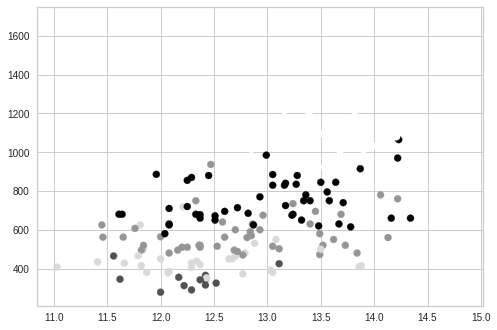

In [ ]:
import matplotlib.pyplot as plt
alcohol=df['Alcohol']
malic=df['Proline']
plt.scatter(alcohol,malic,c=pred_kmeans)


In [ ]:
model_kmeans.inertia_

0.035116697736674876

## **Hierarchical** **clustering**

In [ ]:
import matplotlib.pyplot as plt  
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram



In [ ]:
#normalize

from sklearn.preprocessing import Normalizer
norm=Normalizer()
x=norm.fit_transform(x)


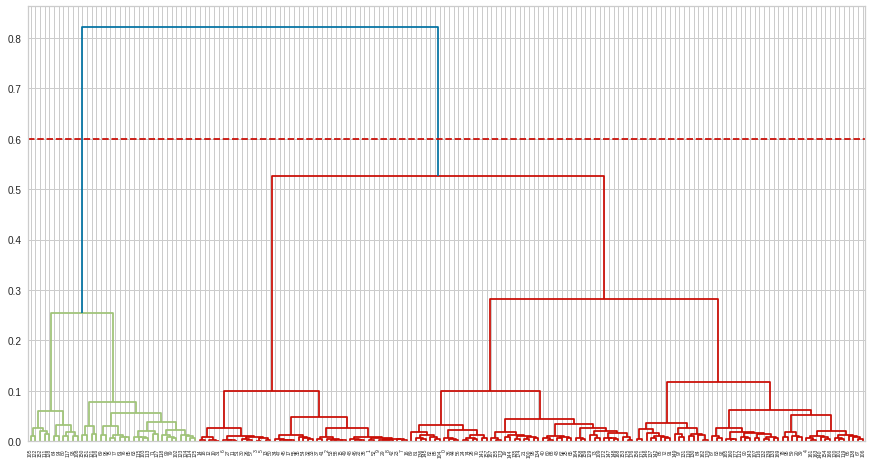

In [ ]:
linked=linkage(x,method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.hlines(0.6,0,5000,color='r',linestyle='dashed')
plt.show()

In [ ]:
#Initialise Model
cluster=AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')

# Modelling the data
model_hc=cluster.fit_predict(x)
model_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

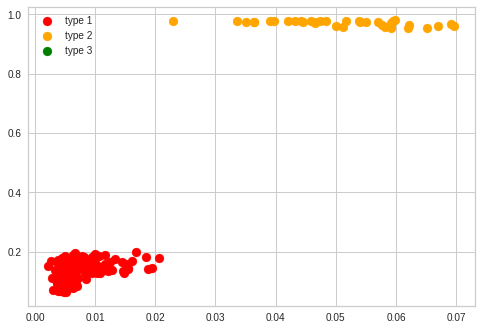

In [ ]:
plt.scatter(x[model_hc==0,9],x[model_hc==0,4], s=80,c='red', label='type 1')
plt.scatter(x[model_hc==1,3],x[model_hc==1,12], s=80,c='orange', label='type 2')
plt.scatter(x[model_hc==2,1],x[model_hc==2,12], s=80,c='green', label='type 3')
plt.legend()
plt.show()

In [ ]:
df1['label_hc']=model_hc
wine=df1[df1["label_hc"]==0]
print('Number of customer in 1st group=', len(wine))
wine=df1[df1["label_hc"]==1]
print('Number of customer in 1st group=', len(wine))

Number of customer in 1st group= 142
Number of customer in 1st group= 36
